In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from partition_decode.plots import continuous_pairplot
from scipy.stats import spearmanr, kendalltau

## Network

In [17]:
#
algo = "network"
dataset = "mnist"

# Read
df = pd.read_csv(f'./results/{dataset}/{dataset}_{algo}_results.csv')

# Define headers
train_error = 'train_01_error'
test_error = 'test_01_error'

# Set to floats
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]

# Average across reps
# df = df.groupby(
#     ['model', 'n_train_samples', 'n_estimators', 'max_depth'],
#     as_index=False
# ).mean()

df.head(5)

,model,rep,n_train_samples,n_test_samples,save_path,hidden_layer_dims,n_epochs,learning_rate,batch_size,verbose,...,IRM_h*,ACTS_h*,entropy,rows_mean_L2,cols_mean_L1,cols_mean_L2,n_parameters,depth,width,generalization_gap
0,network,0.0,10000.0,10000.0,/mnt/ssd3/ronan/pytorch,4.0,1000.0,0.01,128.0,0.0,...,0.0,1.0,0.000000,0.000000,NaN,NaN,3190.0,1.0,4.0,-0.0008
1,network,0.0,10000.0,10000.0,/mnt/ssd3/ronan/pytorch,8.0,1000.0,0.01,128.0,0.0,...,0.0,1.0,0.000000,0.000000,NaN,NaN,6370.0,1.0,8.0,-0.0008
2,network,0.0,10000.0,10000.0,/mnt/ssd3/ronan/pytorch,16.0,1000.0,0.01,128.0,0.0,...,2.0,3.0,10559.503501,0.112962,790.000000,19.874607,12730.0,1.0,16.0,0.0040
3,network,0.0,10000.0,10000.0,/mnt/ssd3/ronan/pytorch,32.0,1000.0,0.01,128.0,0.0,...,0.0,1.0,0.000000,0.000000,NaN,NaN,25450.0,1.0,32.0,-0.0009
4,network,0.0,10000.0,10000.0,/mnt/ssd3/ronan/pytorch,64.0,1000.0,0.01,128.0,0.0,...,13.0,30.0,51648.155107,0.261127,587.230769,7.112785,50890.0,1.0,64.0,0.0417


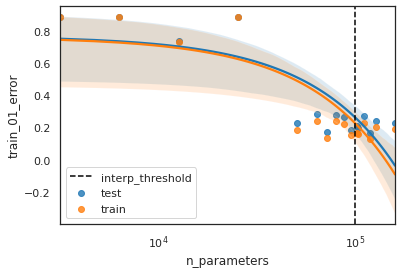

In [18]:
sns.set_style('white')
sns.set_context('notebook')

fig, ax = plt.subplots(1, 1, sharex=True)

sns.regplot(data=df, x='n_parameters', y=test_error, lowess=False, ax=ax, label='test')
sns.regplot(data=df, x='n_parameters', y=train_error, lowess=False, ax=ax, label='train')
ax.axvline(10*df['n_train_samples'].iloc[0], ls='--', c='black', label='interp_threshold')
plt.xscale('log')
plt.legend()
plt.show()

In [6]:
corr_vars = [
    'generalization_gap',
    'n_parameters', 'depth', 'width', 'n_epochs',
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', 'entropy',
    'rows_mean_L2',
    'cols_mean_L1', 'cols_mean_L2',
]
# for hidden_layer_dims in df['hidden_layer_dims'].unique():
# print(hidden_layer_dims)
corr_df = df[corr_vars].corr('spearman')
display(corr_df)
# corr_df.to_csv('./results/dn_spearman_corrs.csv')

,generalization_gap,n_parameters,depth,width,n_epochs,IRM_L1,IRM_L2,n_regions,ACTS_L2,IRM_h*,ACTS_h*,entropy,rows_mean_L2,cols_mean_L1,cols_mean_L2
generalization_gap,1.000000,0.149091,NaN,0.149091,NaN,0.174483,0.239889,0.251656,-0.254311,0.153871,0.248097,0.177035,0.269629,0.637669,0.461644
n_parameters,0.149091,1.000000,NaN,1.000000,NaN,0.929899,0.800021,0.883430,-0.883249,0.987344,-0.305437,0.898222,0.739482,-0.669716,-0.901557
depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
width,0.149091,1.000000,NaN,1.000000,NaN,0.929899,0.800021,0.883430,-0.883249,0.987344,-0.305437,0.898222,0.739482,-0.669716,-0.901557
n_epochs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IRM_L1,0.174483,0.929899,NaN,0.929899,NaN,1.000000,0.940743,0.897338,-0.897399,0.951238,-0.292872,0.993892,0.896285,-0.422551,-0.677041
IRM_L2,0.239889,0.800021,NaN,0.800021,NaN,0.940743,1.000000,0.844460,-0.845064,0.826552,-0.192520,0.963060,0.989076,-0.123061,-0.387245
n_regions,0.251656,0.883430,NaN,0.883430,NaN,0.897338,0.844460,1.000000,-0.999752,0.896895,-0.491583,0.889275,0.827276,-0.437357,-0.709766
ACTS_L2,-0.254311,-0.883249,NaN,-0.883249,NaN,-0.897399,-0.845064,-0.999752,1.000000,-0.896472,0.491832,-0.889336,-0.827699,0.436499,0.708908
IRM_h*,0.153871,0.987344,NaN,0.987344,NaN,0.951238,0.826552,0.896895,-0.896472,1.000000,-0.304059,0.922137,0.769407,-0.643876,-0.884966
